# =========================
# Name-Abhishek Kumar 
# Batch No-DS2309
# =========================

# Project Name- BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not. 
# ******************************************************************************************

# Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


# Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.


# About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 


# Dataset Attributes
Here is the description of all the variables:

•Variable: Definition

•ID: Unique client ID

•age: Age of the client

•job: Type of job

•marital: Marital status of the client

•education: Education level

•default: Credit in default.

•housing: Housing loan

•loan: Personal loan

•contact: Type of communication

•month: Contact month

•day_of_week: Day of week of contact

•duration: Contact duration

•campaign: number of contacts performed during this campaign to the client

•pdays: number of days that passed by after the client was last contacted

•previous: number of contacts performed before this campaign

•poutcome: outcome of the previous marketing campaign

# Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)


You are provided with following 2 files:

1.train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
    
2.test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.


# Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Bank%20Marketing

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv

•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv(r"C:\Users\ASHISH\Downloads\termdeposit_train.csv")
test=pd.read_csv(r"C:\Users\ASHISH\Downloads\termdeposit_test.csv")

In [5]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [8]:
 test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [11]:
train.columns, test.columns

(Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
        'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
        'pdays', 'previous', 'poutcome', 'subscribed'],
       dtype='object'),
 Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
        'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
        'pdays', 'previous', 'poutcome'],
       dtype='object'))

(<Axes: >, <Axes: >)

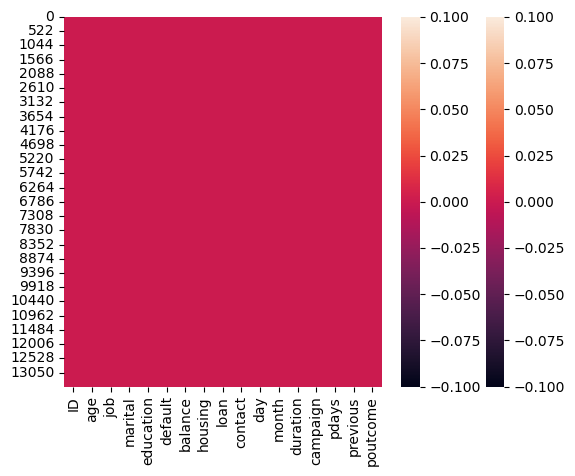

In [21]:
#Checking for missing values in train and test dataset

sns.heatmap(train.isnull()), sns.heatmap(test.isnull())

In [24]:
#checking duplicate value
train.duplicated().sum()
test.duplicated().sum()

0

# Univariate Analysis

In [25]:
#Frequency of 'subscribed' or Not
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

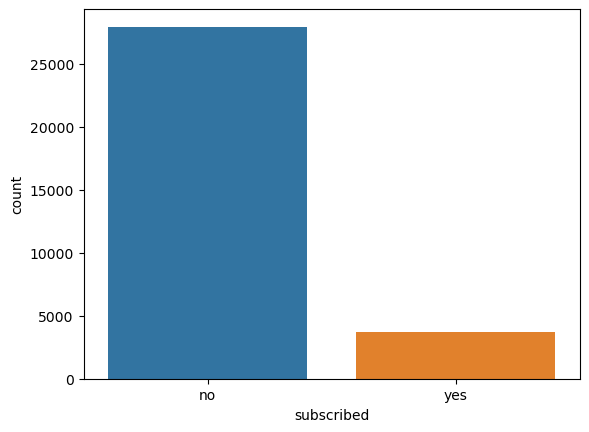

In [31]:
# Plotting the 'subscribed' frequency
sns.countplot(data=train, x='subscribed', )

In [32]:
#Normalizing the frequency table of 'Subscribed' variable
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

In [33]:
#Frequency table
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

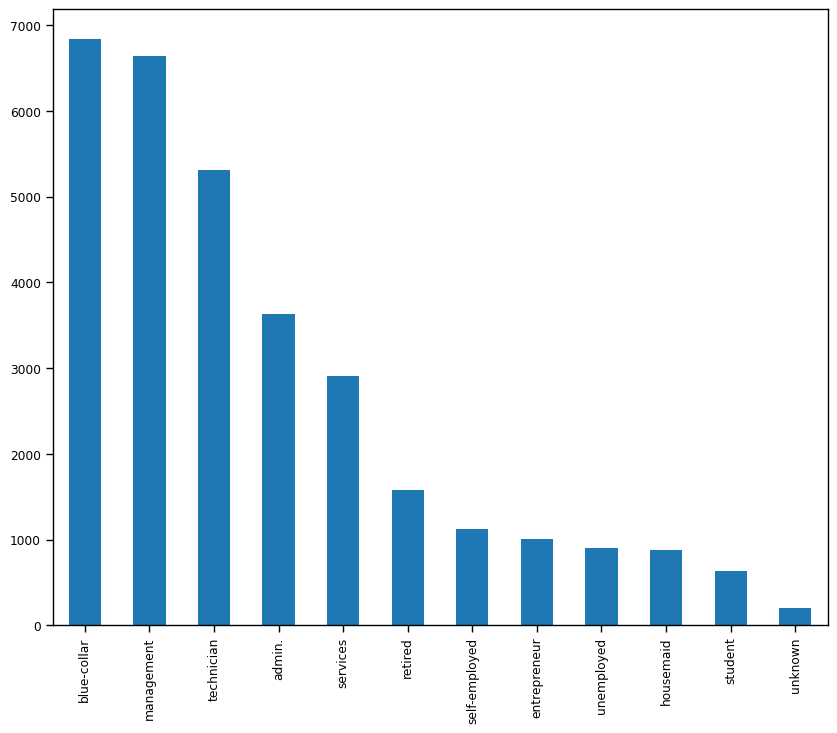

In [34]:
# Plotting the job frequency table
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(10,8));

### comment-
#### We can see that most of the clients belonged to blue-collar job and students are least in general as they don't make term deposits in general.

## Analysis of marital status 

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


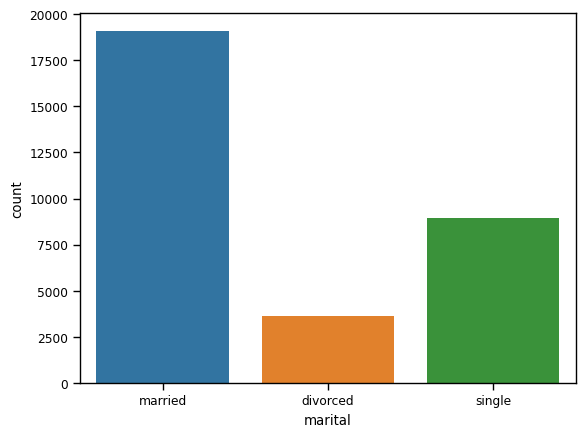

In [36]:
#checking marital status
print(train['marital'].value_counts())
sns.countplot(data=train, x='marital');

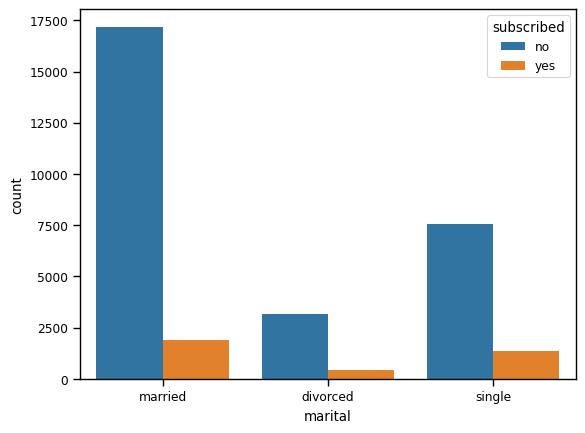

In [37]:
sns.countplot(data=train, x='marital', hue='subscribed');

## Analysis of Age Variable

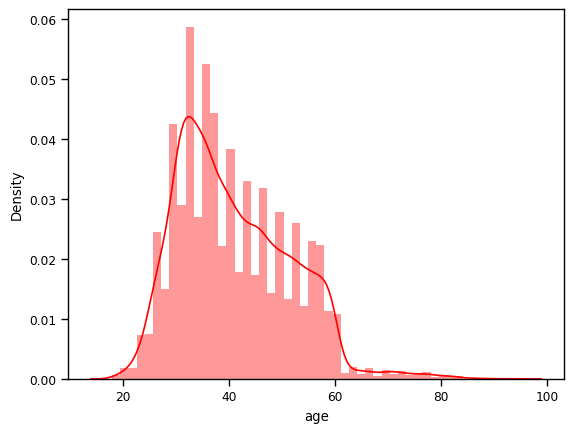

In [39]:
sns.distplot(train['age'],color='r');

comment-
We can see that most of the clients fall in the age group between 20-60.

# Bivariate Analysis 

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


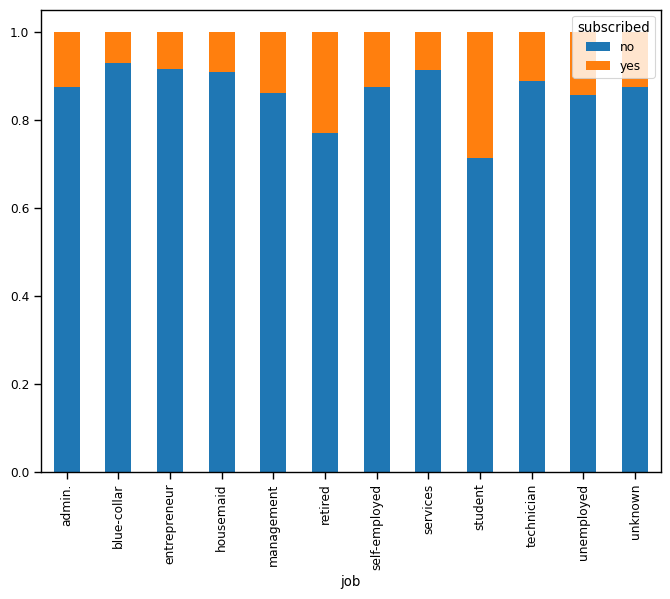

In [44]:
#job vs subscribed
print(pd.crosstab(train['job'],train['subscribed']))

job = pd.crosstab(train['job'],train['subscribed'])
job_n = job.div(job.sum(1).astype(float), axis=0)
job_n.plot.bar(stacked=True,figsize=(8,6));

comment-
From the above graph we can see that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

In [43]:
#Marital status vs subscribed
pd.crosstab(train['marital'], train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


subscribed        no       yes
marital                       
divorced    0.877410  0.122590
married     0.899502  0.100498
single      0.848577  0.151423


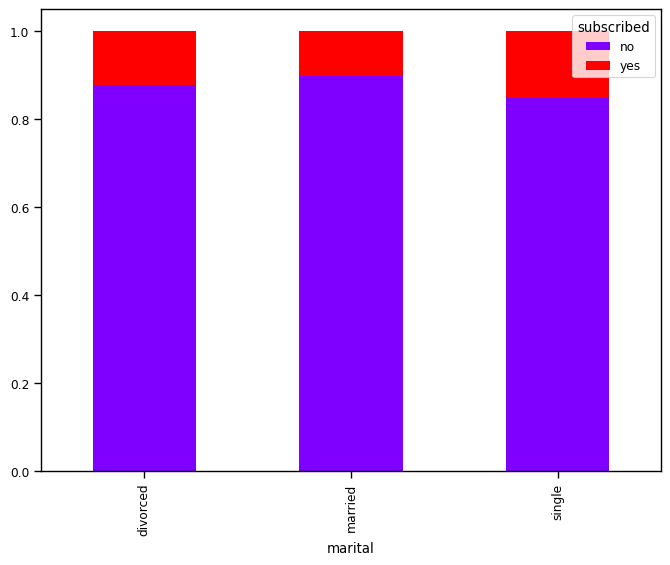

In [47]:
marital = pd.crosstab(train['marital'], train['subscribed'])
marital_n = marital.div(marital.sum(1).astype(float), axis=0)
print(marital_n)
marital_n.plot.bar(stacked=True, figsize=(8,6),cmap='rainbow');

### comment-
From the above analysis we can infer that marital status doesn't have a major impact on the subscription to term deposits.

In [48]:
#default vs subscription
pd.crosstab(train['default'], train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [49]:
dflt = pd.crosstab(train['default'], train['subscribed'])
dflt_n = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_n

subscribed,no,yes
default,,
no,0.881720,0.118280
yes,0.929915,0.070085


<Axes: xlabel='default'>

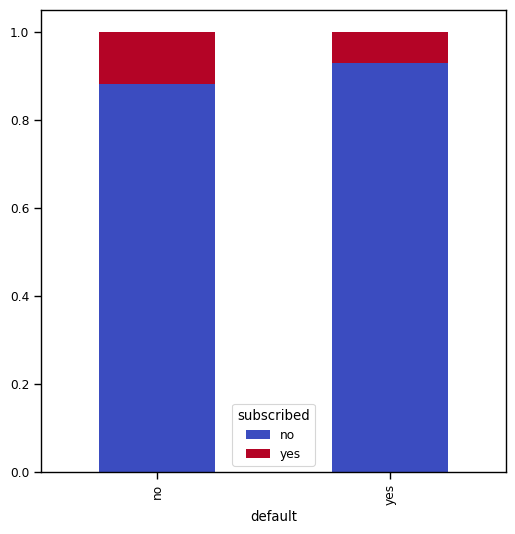

In [50]:
dflt_n.plot.bar(stacked=True, figsize=(6,6),cmap='coolwarm')

### comment-
We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

## Converting the target variables into 0s and 1s

In [52]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)
train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

## Data Correlation 

In [53]:
train_corr=train.corr()
train_corr

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


<Axes: >

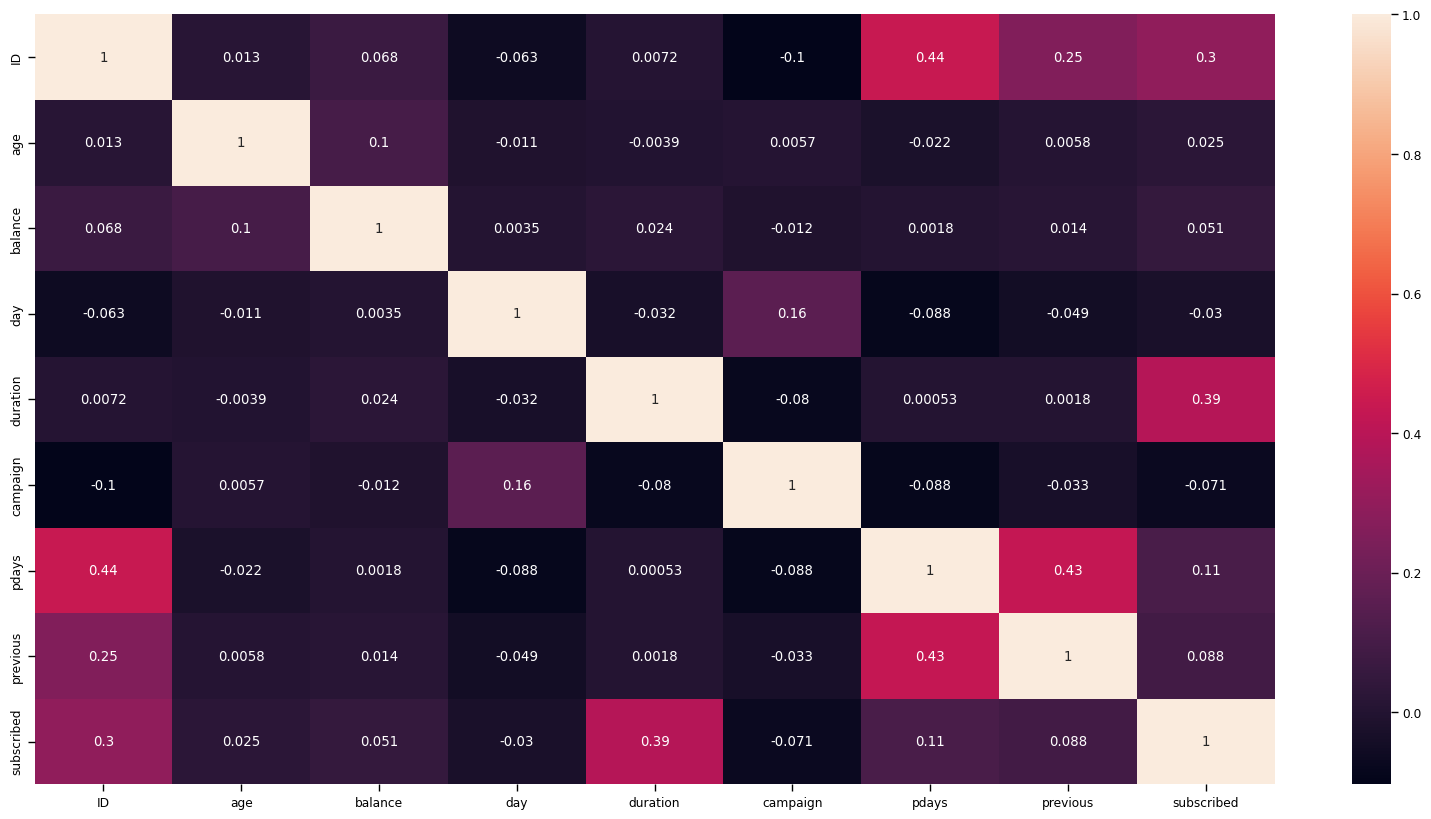

In [56]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(train_corr, annot=True)

Comment-
We can infer that duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

# Model Training 

In [57]:
target = train['subscribed']
train = train.drop('subscribed', axis=1)

In [58]:
#generating dummy values on the train dataset
train = pd.get_dummies(train)
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Splitting the data into train and validation
set such as to validate the results of our model on the validation set.
keeping 20% of the dataset as our validation set and the rest as our training set.

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_val,y_train,y_val=train_test_split(train, target, test_size=0.2, random_state=12)

# Logistic Regression 

In [68]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [69]:
#fitting the data into the model
lr.fit(X_train,y_train)

LogisticRegression()

In [70]:
#Making predictions on the validation set
pred = lr.predict(X_val)

In [83]:
#checking the model accuracy
from sklearn.metrics import accuracy_score
#Calculating the accuracy score
print('\nAccuracy score of LogisticRegression is', accuracy_score(y_val,pred)*100)


Accuracy score of LogisticRegression is 89.21011058451816


# Decision Tree Classifier 

In [75]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [76]:
#fitting the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
#making predictions on the validation set
prediction = dtc.predict(X_val)
prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [84]:
#Calculating the accuracy
print('\nAccuracy score of DecisionTreeClassifier is',accuracy_score(y_val,prediction)*100)


Accuracy score of DecisionTreeClassifier is 88.43601895734598


# K Neighbors Classifier

In [87]:
from sklearn.neighbors import KNeighborsClassifier
KNC=KNeighborsClassifier()

In [88]:
KNC.fit(X_train,y_train)

KNeighborsClassifier()

In [89]:
#making predictions on the validation set
pred2 = dtc.predict(X_val)
pred2

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [90]:
#Calculating the accuracy
print('\nAccuracy score of KNeighborsClassifier is',accuracy_score(y_val,pred2)*100)


Accuracy score of KNeighborsClassifier is 88.43601895734598


In [91]:
#prediction on datd sets
test = pd.get_dummies(test)
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [100]:
test_pred = dtc.predict(test)
test_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [107]:
prediction_ = pd.DataFrame()

In [108]:
prediction_['ID'] = test['ID']
prediction_['subscribed'] = test_pred

In [109]:
prediction_['subscribed']

0        0
1        0
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int64

In [110]:
#the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.
prediction_['subscribed'].replace(0,'no',inplace=True)
prediction_['subscribed'].replace(1,'yes',inplace=True)

In [113]:
prediction_['subscribed']

0         no
1         no
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [114]:
prediction_.to_csv('submission file.csv', header=True, index=False)

 #          *************************** THANKS ****************************